In [49]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import math
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [8]:
data = pd.read_csv('loan_prediction.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<h1> Data Cleaning and Feature Selectiong </h1>

In [9]:
data = data.dropna().drop_duplicates()
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
# label encode and normlize
le = LabelEncoder()
le.fit(["Male","Female"])
data.iloc[:,1] = le.transform(data.iloc[:,1])
le.fit(["Yes", "No"])
data.iloc[:,2] = le.transform(data.iloc[:,2])
le.fit(["0", "1", "2", "3+"])
data.iloc[:,3] = le.transform(data.iloc[:,3])
le.fit(["Graduate", "Not Graduate"])
data.iloc[:,4] = le.transform(data.iloc[:,4])
le.fit(["Yes", "No"])
data.iloc[:,5] = le.transform(data.iloc[:,5])
le.fit(["Rural", "Semiurban", "Urban"])
data.iloc[:,11] = le.transform(data.iloc[:,11])
le.fit(["Y", "N"])
data.iloc[:,12] = le.transform(data.iloc[:,12])

transformer = Normalizer()
transformer.fit(data.iloc[:,[6,7,8,9]])
data.iloc[:,[6,7,8,9]] = transformer.transform(data.iloc[:,[6,7,8,9]])

data = data.drop(columns=["Loan_ID"])

data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,0.946934,0.311581,0.026447,0.074383,1.0,0,0
2,1,1,0,0,1,0.992640,0.000000,0.021838,0.119117,1.0,2,1
3,1,1,0,1,0,0.734232,0.670275,0.034111,0.102332,1.0,2,1
4,1,0,0,0,0,0.997930,0.000000,0.023451,0.059876,1.0,2,1
5,1,1,2,0,1,0.788883,0.611067,0.038883,0.052427,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0.992090,0.000000,0.024289,0.123156,1.0,0,1
610,1,1,3,0,0,0.998993,0.000000,0.009732,0.043794,1.0,0,1
611,1,1,1,0,0,0.998078,0.029675,0.031283,0.044513,1.0,2,1
612,1,1,2,0,0,0.998572,0.000000,0.024625,0.047407,1.0,2,1


In [25]:
y = np.array(data.iloc[:,11:]).reshape(480)
lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(data.iloc[:,:10], y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(data.iloc[:,:10])
X_new.shape
# Married Dependents Education CoapplicantIncome CreditHistory are selected

(480, 5)

We did our feature selection by using the linear svc to  determine which are some most useful features, then we choose it as our feature to train the model.

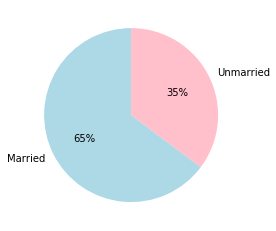

In [40]:
df = pd.DataFrame(X_new, columns=['Married', 'Dependents', 'Education', 'CoapplicantIncome', 'CreditHistory'])
df['CoapplicantIncome']
labels = ['Married','Unmarried']
sizes = [311,169]
colors = ['lightblue', 'pink']
patches, l_text, p_text = plt.pie(sizes,labels=labels, colors=colors,
                                   labeldistance=1.1, autopct='%2.0f%%', shadow=False,startangle=90, pctdistance=0.6)

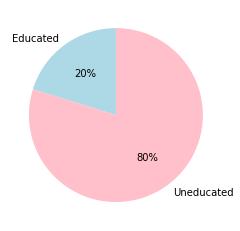

In [42]:
labels = ['Educated','Uneducated']
sizes = [97,480-97]
colors = ['lightblue', 'pink']
patches, l_text, p_text = plt.pie(sizes,labels=labels, colors=colors,
                                   labeldistance=1.1, autopct='%2.0f%%', shadow=False,startangle=90, pctdistance=0.6)


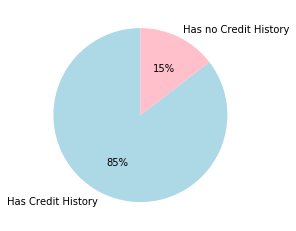

In [43]:
labels = ['Has Credit History','Has no Credit History']
sizes = [410,70]
colors = ['lightblue', 'pink']
patches, l_text, p_text = plt.pie(sizes,labels=labels, colors=colors,
                                   labeldistance=1.1, autopct='%2.0f%%', shadow=False,startangle=90, pctdistance=0.6)


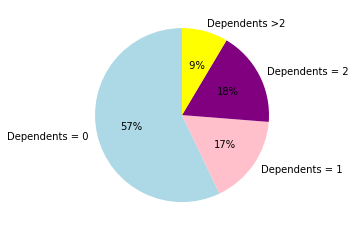

In [44]:
count1 = 0
count2 = 0
count3 = 0
count0 = 0
for i in range(480):
    if (df['Dependents'][i] == 1):
        count1 +=1
    elif (df['Dependents'][i] == 0):
        count0+=1
    elif (df['Dependents'][i] == 2):
        count2+=1
    elif (df['Dependents'][i] == 3):
        count3+=1
        
labels = ['Dependents = 0','Dependents = 1','Dependents = 2','Dependents >2']
sizes = [count0,count1,count2,count3]
colors = ['lightblue', 'pink' ,'purple','yellow']
patches, l_text, p_text = plt.pie(sizes,labels=labels, colors=colors,
                                   labeldistance=1.1, autopct='%2.0f%%', shadow=False,startangle=90, pctdistance=0.6)

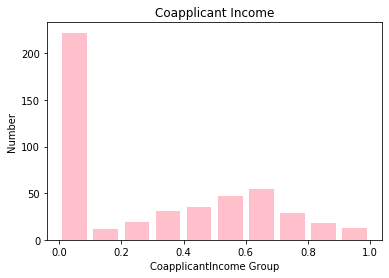

In [45]:
group = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
y_ = df['CoapplicantIncome']
# x = df.index
plt.hist(y_, group, histtype='bar',color = 'pink', rwidth=0.8)


plt.xlabel('CoapplicantIncome Group')
plt.ylabel('Number')

plt.title('Coapplicant Income')

plt.show()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, train_size=0.75)


<h1> Logistic Regression </h1>

In [51]:
logistic_model = LogisticRegression(max_iter=10000, solver="lbfgs").fit(X_train, y_train)
predictions = logistic_model.predict(X_test)
accuracy = logistic_model.score(X_test, y_test)
error = 1-accuracy
cm = confusion_matrix(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Accuracy=",accuracy)
print("Error=",error)
print("Precision=",cm[1,1]/(cm[1,1] + cm[0,1]))
print("Recall=",cm[1,1]/(cm[1,1] + cm[1,0]))
print("F1=", f1)
print("Confused Matrix=", cm)

Accuracy= 0.775
Error= 0.22499999999999998
Precision= 0.7619047619047619
Recall= 0.975609756097561
F1= 0.855614973262032
Confused Matrix= [[13 25]
 [ 2 80]]


AUC= 0.6973684210526316


Text(0.5, 1.0, 'LDA ROC')

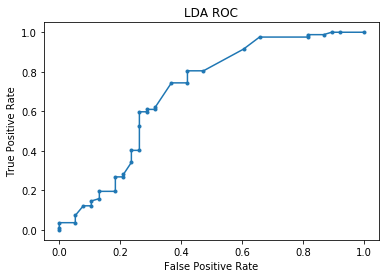

In [48]:
pred_lda = logistic_model.predict_proba(X_test)[:,1]
r_auc_lda = roc_auc_score(y_test, pred_lda)
print("AUC=", r_auc_lda)

lda_fpr, lda_tpr, _ = roc_curve(y_test, pred_lda)
plt.plot(lda_fpr, lda_tpr, marker=".", label="Logistic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LDA ROC")

In [30]:
scores = cross_val_score(logistic_model, X_new, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.81 accuracy with a standard deviation of 0.03


<h1> Naive Bayes </h1>

In [31]:
nv = GaussianNB().fit(X_train, y_train)
predictions = nv.predict(X_test)
accuracy = nv.score(X_test, y_test)
error = 1-accuracy
cm = confusion_matrix(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Accuracy=",accuracy)
print("Error=",error)
print("Precision=",cm[1,1]/(cm[1,1] + cm[0,1]))
print("Recall=",cm[1,1]/(cm[1,1] + cm[1,0]))
print("F1=", f1)
print("Confused Matrix=", cm)

Accuracy= 0.8333333333333334
Error= 0.16666666666666663
Precision= 0.822429906542056
Recall= 0.9887640449438202
F1= 0.8979591836734695
Confused Matrix= [[12 19]
 [ 1 88]]


AUC= 0.7080463936208771


Text(0.5, 1.0, 'Naive Bayes ROC')

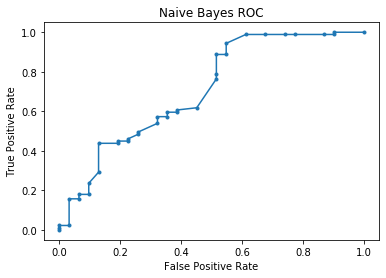

In [32]:
pred_nv = nv.predict_proba(X_test)[:,1]
r_auc_nv = roc_auc_score(y_test, pred_nv)
print("AUC=", r_auc_nv)

nv_fpr, nv_tpr, _ = roc_curve(y_test, pred_nv)
plt.plot(nv_fpr, nv_tpr, marker=".")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naive Bayes ROC")

In [33]:
scores = cross_val_score(nv, X_new, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.81 accuracy with a standard deviation of 0.03


<h1> Ada Boost </h1>

In [34]:
boost = AdaBoostClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
predictions = boost.predict(X_test)
accuracy = boost.score(X_test, y_test)
error = 1-accuracy
cm = confusion_matrix(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Accuracy=",accuracy)
print("Error=",error)
print("Precision=",cm[1,1]/(cm[1,1] + cm[0,1]))
print("Recall=",cm[1,1]/(cm[1,1] + cm[1,0]))
print("F1=", f1)
print("Confused Matrix=", cm)

Accuracy= 0.825
Error= 0.17500000000000004
Precision= 0.8148148148148148
Recall= 0.9887640449438202
F1= 0.8934010152284264
Confused Matrix= [[11 20]
 [ 1 88]]


AUC= 0.719282348677057


Text(0.5, 1.0, 'Ada Boost ROC')

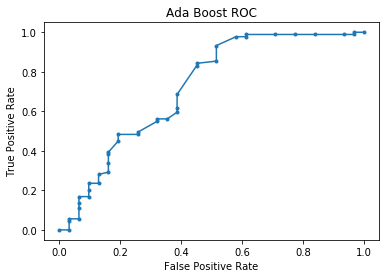

In [35]:
pred_boost = boost.predict_proba(X_test)[:,1]
r_auc_boost = roc_auc_score(y_test, pred_boost)
print("AUC=", r_auc_boost)

boost_fpr, boost_tpr, _ = roc_curve(y_test, pred_boost)
plt.plot(boost_fpr, boost_tpr, marker=".")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Ada Boost ROC")

In [36]:
scores = cross_val_score(boost, X_new, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.79 accuracy with a standard deviation of 0.05


<h1> Random Forests </h1>

In [37]:
forest = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
predictions = forest.predict(X_test)
accuracy = forest.score(X_test, y_test)
error = 1-accuracy
cm = confusion_matrix(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Accuracy=",accuracy)
print("Error=",error)
print("Precision=",cm[1,1]/(cm[1,1] + cm[0,1]))
print("Recall=",cm[1,1]/(cm[1,1] + cm[1,0]))
print("F1=", f1)
print("Confused Matrix=", cm)

Accuracy= 0.775
Error= 0.22499999999999998
Precision= 0.8163265306122449
Recall= 0.898876404494382
F1= 0.8556149732620321
Confused Matrix= [[13 18]
 [ 9 80]]


AUC= 0.7432040594418268


Text(0.5, 1.0, 'Random Forest ROC')

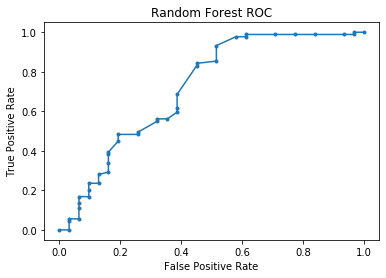

In [38]:
pred_forest = forest.predict_proba(X_test)[:,1]
r_auc_forest = roc_auc_score(y_test, pred_forest)
print("AUC=", r_auc_forest)

forest_fpr, forest_tpr, _ = roc_curve(y_test, pred_boost)
plt.plot(forest_fpr, forest_tpr, marker=".")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC")

In [39]:
scores = cross_val_score(forest, X_new, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.78 accuracy with a standard deviation of 0.03


<h1> Interpretation results </h1>

From the result it is really clear that naive baye and logistic regression have much better experience than adaboost and random forests. This may becuase that I did pre feature selection so there is only 5 features in the example which makes adaboost doesn't have the best performence. 
Married Dependents Education CoapplicantIncome CreditHistory are the most relevant features based on our alogrithm. Accourding to confused matrix, our model has a bad performance at false positive, which means that it predict true but actual is false. This may becasue this data set is too small, in training that there are not enoguh datafor algorithm to make the decision. It is a challenging task that this is a kindly small dataset and the dataset is imbalanced. There is kindly 2/3 yes situation to lend the loan, so the algorithm may intend to give the loan.

<h1> References </h1>

https://numpy.org/doc/
https://pandas.pydata.org/docs/
https://scikit-learn.org/

In [343]:
sum(y_train)

243

In [342]:
len(y_train)

360